In [70]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [79]:
from io import StringIO
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz


def treeviz(tree): 
    dot_data = StringIO()  
    export_graphviz(tree, out_file=dot_data,  
                    feature_names=['petal (cm)', 'sepal (cm)'],  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())  

In [129]:
def plot_model_decision(model, proba=False):
    plt.figure(figsize=(8, 8))
    xx, yy = np.meshgrid(np.linspace(0, 9, 100),
                         np.linspace(0, 9, 100))

    if proba:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=0.3)


    for i, label in enumerate(iris.target_names):
        plt.scatter(X[y == i][:, 0], X[y == i][:, 1], label=label)

    plt.xlabel('Petal (cm)')
    plt.ylabel('Sepal (cm)')
    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.legend(loc='best');

In [130]:
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [81]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [82]:
X = iris.data[:, [2, 0]]
y = iris.target

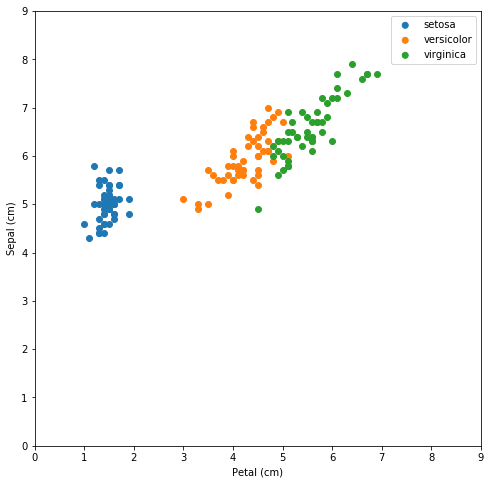

In [94]:
plt.figure(figsize=(8, 8))
for i, label in enumerate(iris.target_names):
    plt.scatter(X[y == i][:, 0], X[y == i][:, 1], label=label)

plt.xlabel('Petal (cm)')
plt.ylabel('Sepal (cm)')
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.legend(loc='best');

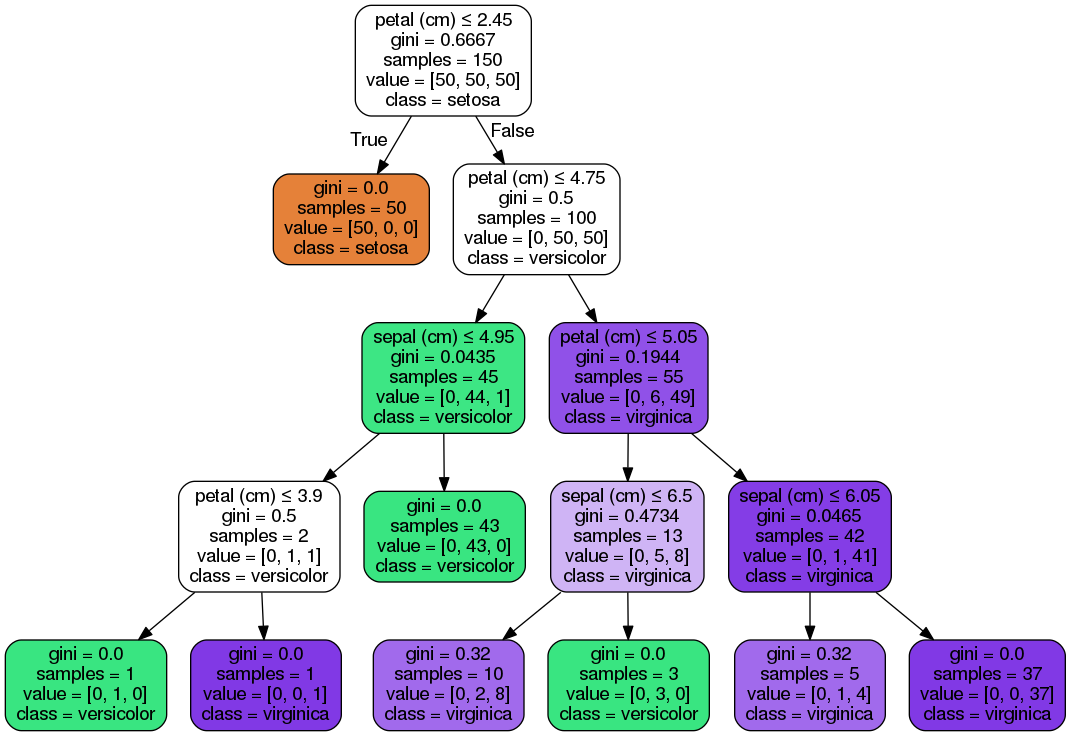

In [91]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4).fit(X, y)
treeviz(tree)

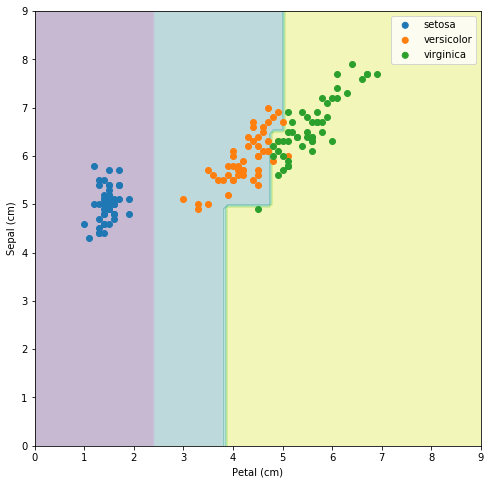

In [105]:
plot_model_decision(tree)

In [125]:
from sklearn.linear_model import Perceptron

nosetosa = y != 0
linear_model = Perceptron(n_iter=50).fit(X[nosetosa], y[nosetosa])

In [126]:
linear_model.coef_

array([[ 102.3,  -66. ]])

In [127]:
linear_model.intercept_

array([-71.])

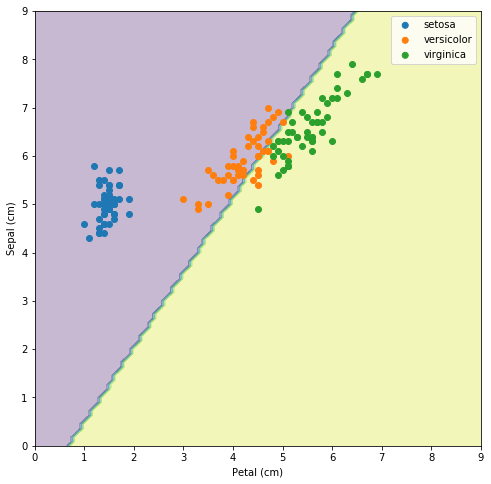

In [128]:
plot_model_decision(linear_model)

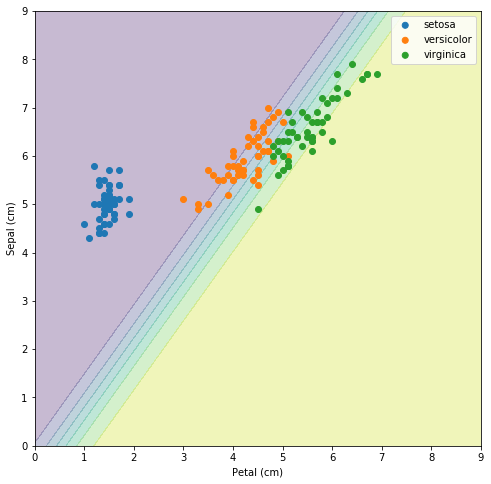

In [131]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression().fit(X[nosetosa], y[nosetosa])
plot_model_decision(lr_model, proba=True)